Load Packages

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [3]:
ccars = pd.read_csv('CCARs.csv')
services = pd.read_csv('Services.csv')

In [4]:
ccars.head()

,CLIENT_ID,CCAR_TYPE,CCAR_DATE,HOUSING,LEVEL_OF_FUNCTIONING,SYMPTOM_SEVERITY,HOPE
0,4A8998A4966913,NaN,4/15/2015,15,3,3,1
1,A628826A899812,NaN,4/15/2015,12,6,6,6
2,44277244933913,NaN,4/15/2015,14,5,5,2
3,A153351A411412,NaN,4/15/2015,15,3,6,2
4,22655622722713,1.0,4/15/2015,15,3,3,3


In [5]:
services.head()

,CLIENT_ID,MBR_AGE,MBR_GENDER,MBR_PRIMARY_LANGUAGE,MBR_ZIPCODE,MEDICAID_ELIG_CAT,SERVICE_DATE,SERVICE_CODE,SERV_CODE_DESCRP,DIAGNOSIS,...,SERVICE_TYPE,SERVICE_DURATION,ADMISSION_DATE,DISCHARGE_DATE,PROVIDER,PRV_TYP_DESC,PROV_CREDENTIALS,PROV_ZIPCODE,PROV_FLAG,SOURCE
0,69266296A66A31,40,Male,ENGLISH,80304,DISABLED,1/1/2015,H0018,Behavioral health; short-term residential (non...,Other Schizoaffective Disorders,...,ATU,1260,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,CAC III,80304,MHP CMHC,Encounter
1,58777785A44A11,28,Male,ENGLISH,80302,DISABLED,1/1/2015,H0018,Behavioral health; short-term residential (non...,Other Schizoaffective Disorders,...,ATU,360,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,CAC III,80304,MHP CMHC,Encounter
2,87855878244282,20,Female,ENGLISH,80504,DISABLED,1/1/2015,H0018,Behavioral health; short-term residential (non...,Other Schizoaffective Disorders,...,ATU,1310,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,CAC III,80304,MHP CMHC,Encounter
3,49A88A94244201,36,Male,ENGLISH,80304,DISABLED,1/1/2015,H0018,Behavioral health; short-term residential (non...,"Schizophrenia, Unspecified",...,ATU,1440,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,CAC III,80304,MHP CMHC,Encounter
4,7A8778A7799771,45,Female,ENGLISH,80302,DISABLED,1/1/2015,H0018,Behavioral health; short-term residential (non...,"Schizophrenia, Unspecified",...,ATU,1080,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,CAC III,80304,MHP CMHC,Encounter


In [6]:
services['CLAIM'] = services['SOURCE'].str.contains('Claim', regex=True).astype(int)

In [7]:
services.drop('SOURCE', axis=1,inplace=True)

In [8]:
services.head(1)

,CLIENT_ID,MBR_AGE,MBR_GENDER,MBR_PRIMARY_LANGUAGE,MBR_ZIPCODE,MEDICAID_ELIG_CAT,SERVICE_DATE,SERVICE_CODE,SERV_CODE_DESCRP,DIAGNOSIS,...,SERVICE_TYPE,SERVICE_DURATION,ADMISSION_DATE,DISCHARGE_DATE,PROVIDER,PRV_TYP_DESC,PROV_CREDENTIALS,PROV_ZIPCODE,PROV_FLAG,CLAIM
0,69266296A66A31,40,Male,ENGLISH,80304,DISABLED,1/1/2015,H0018,Behavioral health; short-term residential (non...,Other Schizoaffective Disorders,...,ATU,1260,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,CAC III,80304,MHP CMHC,0


In [9]:
ccars.columns

Index([u'CLIENT_ID', u'CCAR_TYPE', u'CCAR_DATE', u'HOUSING',
       u'LEVEL_OF_FUNCTIONING', u'SYMPTOM_SEVERITY', u'HOPE'],
      dtype='object')

In [10]:
services.columns

Index([u'CLIENT_ID', u'MBR_AGE', u'MBR_GENDER', u'MBR_PRIMARY_LANGUAGE',
       u'MBR_ZIPCODE', u'MEDICAID_ELIG_CAT', u'SERVICE_DATE', u'SERVICE_CODE',
       u'SERV_CODE_DESCRP', u'DIAGNOSIS', u'SERVICE_UNITS', u'CHARGED_AMT',
       u'PAID_AMT', u'SERVICE_TYPE', u'SERVICE_DURATION', u'ADMISSION_DATE',
       u'DISCHARGE_DATE', u'PROVIDER', u'PRV_TYP_DESC', u'PROV_CREDENTIALS',
       u'PROV_ZIPCODE', u'PROV_FLAG', u'CLAIM'],
      dtype='object')

In [23]:
df = pd.merge(ccars, services, on='CLIENT_ID', how='left')

In [24]:
df.head()

,CLIENT_ID,CCAR_TYPE,CCAR_DATE,HOUSING,LEVEL_OF_FUNCTIONING,SYMPTOM_SEVERITY,HOPE,MBR_AGE,MBR_GENDER,MBR_PRIMARY_LANGUAGE,...,SERVICE_TYPE,SERVICE_DURATION,ADMISSION_DATE,DISCHARGE_DATE,PROVIDER,PRV_TYP_DESC,PROV_CREDENTIALS,PROV_ZIPCODE,PROV_FLAG,CLAIM
0,4A8998A4966913,NaN,4/15/2015,15,3,3,1,14.0,Female,ENGLISH,...,OUTPATIENT,40,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,LPC,80304.0,MHP CMHC,0.0
1,4A8998A4966913,NaN,4/15/2015,15,3,3,1,14.0,Female,ENGLISH,...,OUTPATIENT,30,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,MD/DO,80304.0,MHP CMHC,0.0
2,4A8998A4966913,NaN,4/15/2015,15,3,3,1,14.0,Female,ENGLISH,...,CASE MGT,11,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,LPC,80304.0,MHP CMHC,0.0
3,4A8998A4966913,NaN,4/15/2015,15,3,3,1,14.0,Female,ENGLISH,...,OUTPATIENT,50,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,LPC,80304.0,MHP CMHC,0.0
4,4A8998A4966913,NaN,4/15/2015,15,3,3,1,14.0,Female,ENGLISH,...,OUTPATIENT,55,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,LPC,80304.0,MHP CMHC,0.0


In [25]:
len(services)

335880

In [26]:
len(ccars)

15079

In [27]:
len(df)

651962

In [28]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [29]:
len(df)

307370

In [30]:
df.head()

,CLIENT_ID,CCAR_TYPE,CCAR_DATE,HOUSING,LEVEL_OF_FUNCTIONING,SYMPTOM_SEVERITY,HOPE,MBR_AGE,MBR_GENDER,MBR_PRIMARY_LANGUAGE,...,SERVICE_TYPE,SERVICE_DURATION,ADMISSION_DATE,DISCHARGE_DATE,PROVIDER,PRV_TYP_DESC,PROV_CREDENTIALS,PROV_ZIPCODE,PROV_FLAG,CLAIM
32,22655622722713,1.0,4/15/2015,15,3,3,3,17.0,Female,ENGLISH,...,OUTPATIENT,30,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,MD/DO,80304.0,MHP CMHC,0.0
33,22655622722713,1.0,4/15/2015,15,3,3,3,17.0,Female,ENGLISH,...,OUTPATIENT,30,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,ANP,80304.0,MHP CMHC,0.0
34,22655622722713,1.0,4/15/2015,15,3,3,3,17.0,Female,ENGLISH,...,OUTPATIENT,15,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,RN,80304.0,MHP CMHC,0.0
36,22655622722713,1.0,4/15/2015,15,3,3,3,17.0,Female,ENGLISH,...,CASE MGT,15,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,RN,80304.0,MHP CMHC,0.0
37,22655622722713,1.0,4/15/2015,15,3,3,3,17.0,Female,ENGLISH,...,OUTPATIENT,45,,,MENTAL HEALTH PARTNERS,COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY,RN,80304.0,MHP CMHC,0.0


In [31]:
df.columns

Index([u'CLIENT_ID', u'CCAR_TYPE', u'CCAR_DATE', u'HOUSING',
       u'LEVEL_OF_FUNCTIONING', u'SYMPTOM_SEVERITY', u'HOPE', u'MBR_AGE',
       u'MBR_GENDER', u'MBR_PRIMARY_LANGUAGE', u'MBR_ZIPCODE',
       u'MEDICAID_ELIG_CAT', u'SERVICE_DATE', u'SERVICE_CODE',
       u'SERV_CODE_DESCRP', u'DIAGNOSIS', u'SERVICE_UNITS', u'CHARGED_AMT',
       u'PAID_AMT', u'SERVICE_TYPE', u'SERVICE_DURATION', u'ADMISSION_DATE',
       u'DISCHARGE_DATE', u'PROVIDER', u'PRV_TYP_DESC', u'PROV_CREDENTIALS',
       u'PROV_ZIPCODE', u'PROV_FLAG', u'CLAIM'],
      dtype='object')

Create dummy columns for:<br>
<li>PRV_TYP_DESC
<li>SERVICE_TYPE
<li>SERV_CODE_DESCRP
<li>MEDICAID_ELIG_CAT
<li>MBR_PRIMARY_LANGUAGE
<li>MBR_GENDER
<li>CCAR_TYPE

In [33]:
df.groupby('PRV_TYP_DESC')['CLIENT_ID'].count()

PRV_TYP_DESC
COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY    302240
PRACTITIONER                                           5130
Name: CLIENT_ID, dtype: int64

In [34]:
df.groupby('SERVICE_TYPE')['CLIENT_ID'].count()

SERVICE_TYPE
ATU             17154
CASE MGT        68624
OUTPATIENT     196784
RESIDENTIAL        16
RESPITE          2675
SUD             17500
VOCATIONAL       4617
Name: CLIENT_ID, dtype: int64

In [35]:
df.groupby('MEDICAID_ELIG_CAT')['CLIENT_ID'].count()

MEDICAID_ELIG_CAT
ADULT           17396
AwDC            81300
CHILD           20907
DISABLED       167707
ELDERLY          7535
FOSTER CARE     12370
OTHER             155
Name: CLIENT_ID, dtype: int64

In [36]:
df.groupby('SERV_CODE_DESCRP')['CLIENT_ID'].count()

SERV_CODE_DESCRP
30-minute psychotherapy add-on code                                                                                                                                                                                                                                                                                                          258
Activity therapy, per 15 minutes                                                                                                                                                                                                                                                                                                            3116
Alcohol and/or drug services; case management                                                                                                                                                                                                                                                                        

In [37]:
df.groupby('MBR_PRIMARY_LANGUAGE')['CLIENT_ID'].count()

MBR_PRIMARY_LANGUAGE
ENGLISH          302740
PERSIAN              60
RUSSIAN             118
SIGN LANGUAGE       192
SPANISH            4260
Name: CLIENT_ID, dtype: int64

In [38]:
df.groupby('MBR_GENDER')['CLIENT_ID'].count()

MBR_GENDER
Female     138718
Male       168416
Unknown       236
Name: CLIENT_ID, dtype: int64

In [39]:
df.groupby('CCAR_TYPE')['CLIENT_ID'].count()

CCAR_TYPE
1.0    302075
2.0      2402
3.0      1574
7.0      1319
Name: CLIENT_ID, dtype: int64

In [40]:
df = pd.get_dummies(data=df,columns=['PRV_TYP_DESC','SERVICE_TYPE','SERV_CODE_DESCRP','MEDICAID_ELIG_CAT',
                                     'MBR_PRIMARY_LANGUAGE','MBR_GENDER','CCAR_TYPE']).head()

In [41]:
df.describe()

,HOUSING,LEVEL_OF_FUNCTIONING,SYMPTOM_SEVERITY,HOPE,MBR_AGE,MBR_ZIPCODE,SERVICE_UNITS,CHARGED_AMT,PAID_AMT,PROV_ZIPCODE,...,MBR_PRIMARY_LANGUAGE_RUSSIAN,MBR_PRIMARY_LANGUAGE_SIGN LANGUAGE,MBR_PRIMARY_LANGUAGE_SPANISH,MBR_GENDER_Female,MBR_GENDER_Male,MBR_GENDER_Unknown,CCAR_TYPE_1.0,CCAR_TYPE_2.0,CCAR_TYPE_3.0,CCAR_TYPE_7.0
count,5.0,5.0,5.0,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,15.0,3.0,3.0,3.0,17.0,80304.0,1.400000,226.200000,224.200000,80304.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.894427,97.735357,96.719698,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,15.0,3.0,3.0,3.0,17.0,80304.0,1.000000,126.000000,125.000000,80304.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,15.0,3.0,3.0,3.0,17.0,80304.0,1.000000,156.000000,154.000000,80304.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,15.0,3.0,3.0,3.0,17.0,80304.0,1.000000,232.000000,231.000000,80304.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,15.0,3.0,3.0,3.0,17.0,80304.0,1.000000,239.000000,237.000000,80304.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
max,15.0,3.0,3.0,3.0,17.0,80304.0,3.000000,378.000000,374.000000,80304.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
list(df)

['CLIENT_ID',
 'CCAR_DATE',
 'HOUSING',
 'LEVEL_OF_FUNCTIONING',
 'SYMPTOM_SEVERITY',
 'HOPE',
 'MBR_AGE',
 'MBR_ZIPCODE',
 'SERVICE_DATE',
 'SERVICE_CODE',
 'DIAGNOSIS',
 'SERVICE_UNITS',
 'CHARGED_AMT',
 'PAID_AMT',
 'SERVICE_DURATION',
 'ADMISSION_DATE',
 'DISCHARGE_DATE',
 'PROVIDER',
 'PROV_CREDENTIALS',
 'PROV_ZIPCODE',
 'PROV_FLAG',
 'CLAIM',
 'PRV_TYP_DESC_COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY',
 'PRV_TYP_DESC_PRACTITIONER',
 'SERVICE_TYPE_ATU',
 'SERVICE_TYPE_CASE MGT',
 'SERVICE_TYPE_OUTPATIENT',
 'SERVICE_TYPE_RESIDENTIAL',
 'SERVICE_TYPE_RESPITE',
 'SERVICE_TYPE_SUD',
 'SERVICE_TYPE_VOCATIONAL',
 'SERV_CODE_DESCRP_30-minute psychotherapy add-on code',
 'SERV_CODE_DESCRP_Activity therapy, per 15 minutes',
 'SERV_CODE_DESCRP_Alcohol and/or drug services; case management',
 'SERV_CODE_DESCRP_Alcohol and/or drug services; group counseling by a clinician.  **A planned therapeutic or counseling activity conducted by a clinician with a group (i.e., more than 1 but not 

In [45]:
cor = df.corr()

In [47]:
cor = cor.dropna(axis=1, how='all')

In [49]:
cor = cor.dropna(axis=0, how='all')
cor

,SERVICE_UNITS,CHARGED_AMT,PAID_AMT,SERVICE_TYPE_CASE MGT,SERVICE_TYPE_OUTPATIENT,SERV_CODE_DESCRP_CASE MANAGEMENT,"SERV_CODE_DESCRP_Crisis intervention service, per 15 minutes",SERV_CODE_DESCRP_Established Patient office or outpatient visit - 15 min,SERV_CODE_DESCRP_Established Patient office or outpatient visit - 25 min
SERVICE_UNITS,1.000000,0.868251,0.865809,-0.250000,0.250000,-0.250000,0.612372,-0.250000,-0.250000
CHARGED_AMT,0.868251,1.000000,0.999975,0.033174,-0.033174,0.033174,0.240978,-0.401523,0.073212
PAID_AMT,0.865809,0.999975,1.000000,0.039302,-0.039302,0.039302,0.238789,-0.405739,0.073981
SERVICE_TYPE_CASE MGT,-0.250000,0.033174,0.039302,1.000000,-1.000000,1.000000,-0.408248,-0.250000,-0.250000
SERVICE_TYPE_OUTPATIENT,0.250000,-0.033174,-0.039302,-1.000000,1.000000,-1.000000,0.408248,0.250000,0.250000
SERV_CODE_DESCRP_CASE MANAGEMENT,-0.250000,0.033174,0.039302,1.000000,-1.000000,1.000000,-0.408248,-0.250000,-0.250000
"SERV_CODE_DESCRP_Crisis intervention service, per 15 minutes",0.612372,0.240978,0.238789,-0.408248,0.408248,-0.408248,1.000000,-0.408248,-0.408248
SERV_CODE_DESCRP_Established Patient office or outpatient visit - 15 min,-0.250000,-0.401523,-0.405739,-0.250000,0.250000,-0.250000,-0.408248,1.000000,-0.250000
SERV_CODE_DESCRP_Established Patient office or outpatient visit - 25 min,-0.250000,0.073212,0.073981,-0.250000,0.250000,-0.250000,-0.408248,-0.250000,1.000000


Drop SERVICE_UNITS and CHARGED_AMT

In [54]:
df2 = df.drop('SERVICE_UNITS', axis=1)

In [55]:
df2 = df2.drop('CHARGED_AMT', axis=1)

Calculate distance (in days) between:<br>
<li>CCAR_DATE - SERVICE_DATE
<li>DISCHARGE DATE - ADMISSION DATE
<br><br>
(Remove any negatives?)

In [58]:
df2.SERVICE_DATE.describe

<bound method Series.describe of 32     1/8/2015
33    2/12/2015
34    3/11/2015
36    3/12/2015
37    3/12/2015
Name: SERVICE_DATE, dtype: object>

In [60]:
df2['SERVICE_DATE'] = pd.to_datetime(df2['SERVICE_DATE'])

In [61]:
df2.SERVICE_DATE.describe

<bound method Series.describe of 32   2015-01-08
33   2015-02-12
34   2015-03-11
36   2015-03-12
37   2015-03-12
Name: SERVICE_DATE, dtype: datetime64[ns]>

In [62]:
df2['CCAR_DATE'] = pd.to_datetime(df2['CCAR_DATE'])

In [63]:
df2.loc[:,'DAYS_TO_SERVICE'] = (df2.SERVICE_DATE - df2.CCAR_DATE).astype('timedelta64[h]')

In [65]:
df2['DAYS_TO_SERVICE'] = (df2.DAYS_TO_SERVICE / 24)

In [66]:
df2.head()

,CLIENT_ID,CCAR_DATE,HOUSING,LEVEL_OF_FUNCTIONING,SYMPTOM_SEVERITY,HOPE,MBR_AGE,MBR_ZIPCODE,SERVICE_DATE,SERVICE_CODE,...,MBR_PRIMARY_LANGUAGE_SIGN LANGUAGE,MBR_PRIMARY_LANGUAGE_SPANISH,MBR_GENDER_Female,MBR_GENDER_Male,MBR_GENDER_Unknown,CCAR_TYPE_1.0,CCAR_TYPE_2.0,CCAR_TYPE_3.0,CCAR_TYPE_7.0,DAYS_TO_SERVICE
32,22655622722713,2015-04-15,15,3,3,3,17.0,80304.0,2015-01-08,99214,...,0,0,1,0,0,1,0,0,0,-97.0
33,22655622722713,2015-04-15,15,3,3,3,17.0,80304.0,2015-02-12,99213,...,0,0,1,0,0,1,0,0,0,-62.0
34,22655622722713,2015-04-15,15,3,3,3,17.0,80304.0,2015-03-11,H2011,...,0,0,1,0,0,1,0,0,0,-35.0
36,22655622722713,2015-04-15,15,3,3,3,17.0,80304.0,2015-03-12,90887,...,0,0,1,0,0,1,0,0,0,-34.0
37,22655622722713,2015-04-15,15,3,3,3,17.0,80304.0,2015-03-12,H2011,...,0,0,1,0,0,1,0,0,0,-34.0


In [73]:
df2['ADMISSION_DATE']

32     
33     
34     
36     
37     
Name: ADMISSION_DATE, dtype: object

In [72]:
df2['DISCHARGE_DATE']

32     
33     
34     
36     
37     
Name: DISCHARGE_DATE, dtype: object

In [67]:
list(df2)

['CLIENT_ID',
 'CCAR_DATE',
 'HOUSING',
 'LEVEL_OF_FUNCTIONING',
 'SYMPTOM_SEVERITY',
 'HOPE',
 'MBR_AGE',
 'MBR_ZIPCODE',
 'SERVICE_DATE',
 'SERVICE_CODE',
 'DIAGNOSIS',
 'PAID_AMT',
 'SERVICE_DURATION',
 'ADMISSION_DATE',
 'DISCHARGE_DATE',
 'PROVIDER',
 'PROV_CREDENTIALS',
 'PROV_ZIPCODE',
 'PROV_FLAG',
 'CLAIM',
 'PRV_TYP_DESC_COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY',
 'PRV_TYP_DESC_PRACTITIONER',
 'SERVICE_TYPE_ATU',
 'SERVICE_TYPE_CASE MGT',
 'SERVICE_TYPE_OUTPATIENT',
 'SERVICE_TYPE_RESIDENTIAL',
 'SERVICE_TYPE_RESPITE',
 'SERVICE_TYPE_SUD',
 'SERVICE_TYPE_VOCATIONAL',
 'SERV_CODE_DESCRP_30-minute psychotherapy add-on code',
 'SERV_CODE_DESCRP_Activity therapy, per 15 minutes',
 'SERV_CODE_DESCRP_Alcohol and/or drug services; case management',
 'SERV_CODE_DESCRP_Alcohol and/or drug services; group counseling by a clinician.  **A planned therapeutic or counseling activity conducted by a clinician with a group (i.e., more than 1 but not more than 12) of unrelated clients

Now let's create a table wiht only the following columns:<br>
<li>CLIENT_ID
<li>HOUSING
<li>LEVEL_OF_FUNCTIONING
<li>SYMPTOMS_SERVERITY
<li>HOPE
<li>MBR_AGE
<li>PRV_TYPE_DESC_COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY
<li>PRV_TYP_DESC_PRACTITIONER
<li>SERVICE_TYPE_ATU
<li>SERVICE_TYPE_CASE MGT
<li>SERVICE_TYPE_OUTPATIENT
<li>SERVICE_TYPE_RESIDENTIAL
<li>SERVICE_TYPE_RESPITE
<li>SERVICE_TYPE_SUD
<li>SERVICE_TYPE_VOCATIONAL
<li>MEDICAID_ELIG_CAT_ADULT
<li>MEDICAID_ELIG_CAT_AwDC
<li>MEDICAID_ELIG_CAT_CHILD
<li>MEDICAID_ELIG_CAT_DISABLED
<li>MEDICAID_ELIG_CAT_ELDERLY
<li>MEDICAID_ELIG_CAT_FOSTER CARE
<li>MEDICAID_ELIG_CAT_OTHER
<li>MBR_PRIMARY_LANGUAGE_ENGLISH
<li>MBR_PRIMARY_LANGUAGE_PERSIAN
<li>MBR_PRIMARY_LANGUAGE_RUSSIAN
<li>MBR_PRIMARY_LANGUAGE_SIGN LANGUAGE
<li>MBR_PRIMARY_LANGUAGE_SPANISH
<li>MBR_GENDER_Female
<li>MBR_GENDER_Male
<li>MBR_GENDER_Unknown
<li>CCAR_TYPE_1.0
<li>CCAR_TYPE_2.0
<li>CCAR_TYPE_3.0
<li>CCAR_TYPE_7.0
<li>DAYS_TO_SERVICE

In [78]:
cols_of_interest = ['CLIENT_ID','CLAIM','HOUSING','LEVEL_OF_FUNCTIONING','SYMPTOM_SEVERITY','HOPE','MBR_AGE',
                    'PRV_TYP_DESC_COMMUNITY MENTAL HEALTH CENTER OR PUB HLTH AGENCY',
                    'PRV_TYP_DESC_PRACTITIONER','SERVICE_TYPE_ATU','SERVICE_TYPE_CASE MGT',
                    'SERVICE_TYPE_OUTPATIENT','SERVICE_TYPE_RESIDENTIAL','SERVICE_TYPE_RESPITE',
                    'SERVICE_TYPE_SUD','SERVICE_TYPE_VOCATIONAL','MEDICAID_ELIG_CAT_ADULT',
                    'MEDICAID_ELIG_CAT_AwDC','MEDICAID_ELIG_CAT_CHILD','MEDICAID_ELIG_CAT_DISABLED',
                    'MEDICAID_ELIG_CAT_ELDERLY','MEDICAID_ELIG_CAT_FOSTER CARE',
                    'MEDICAID_ELIG_CAT_OTHER','MBR_PRIMARY_LANGUAGE_ENGLISH',
                    'MBR_PRIMARY_LANGUAGE_PERSIAN','MBR_PRIMARY_LANGUAGE_RUSSIAN',
                    'MBR_PRIMARY_LANGUAGE_SIGN LANGUAGE','MBR_PRIMARY_LANGUAGE_SPANISH',
                    'MBR_GENDER_Female','MBR_GENDER_Male','MBR_GENDER_Unknown','CCAR_TYPE_1.0',
                    'CCAR_TYPE_2.0','CCAR_TYPE_3.0','CCAR_TYPE_7.0','DAYS_TO_SERVICE']

In [94]:
df3 = df2[cols_of_interest]

In [95]:
X = df3.drop('CLAIM',axis=1)

In [96]:
Y = df3.CLAIM

In [97]:
dt = tree.DecisionTreeClassifier(max_depth=4)

In [98]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

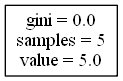

In [99]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [ ]:
cols_of_interest2 = ['MBR_GENDER_MALE',]

In [ ]:
df5 = df2[cols_of_interest2]